**Importing libraries and visualizing data.**

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from joblib import dump, load
import pandas as pd 
import numpy as np 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

df = pd.read_excel('Clinical Data.xlsx', sheet_name= "DATACOMPLETA") 
df.head(5) 

,Diagnostico,Genero,Edad,Escolaridad,IL_2,IL_6,IL_10,TNFa,SAP,CRP,...,T_ADLQ_I_Basic,T_ADLQ_I_Instrumental,T_ADLQ_I_Advanced,MiniSea_MiniSea_Total_FauxPas,MiniSea_MiniSea_Total_EkmanFaces,MiniSea_minisea_total,RCF_Time,RCF_Total_Score,TMT_A_Time,TMT_B_Time
0,0.0,M,78.0,12.0,0.000,0.245,5.29,14.05,4154.0,384.0,...,0.0,0.158730,0.750000,11.250,12.000,23.250,176.0,31.0,75.0,175.0
1,0.0,M,73.0,15.0,0.065,3.120,4.38,10.84,8826.0,8332.0,...,NaN,NaN,NaN,11.625,10.714,22.339,179.0,29.0,70.0,147.0
2,0.0,M,73.0,12.0,0.000,0.610,62.60,20.35,4700.0,19096.0,...,NaN,NaN,NaN,8.625,10.714,19.339,91.0,29.0,63.0,141.0
3,0.0,F,71.0,12.0,0.195,1.615,3.23,10.25,7558.0,21330.0,...,0.0,0.192982,0.333333,8.625,7.714,16.339,351.0,35.0,35.0,91.0
4,0.0,M,74.0,10.0,0.000,0.300,1.81,7.63,6508.0,436.0,...,0.0,0.092593,0.466667,12.000,12.429,24.429,125.0,32.0,72.0,128.0


**Saving and displaying rows with NAN's**

In [2]:
rows_with_nan = [index for index, row in df.iterrows() if row.isnull().any()]

print(rows_with_nan)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 20, 21, 24, 27, 42, 44, 51, 57, 61, 62, 63, 66, 82, 87, 88, 94, 98, 99, 100, 103, 110, 112, 117, 119, 120, 121, 123, 124, 128, 129, 130, 133, 134, 135, 141, 142, 143, 164, 169, 172, 177, 180, 183, 184, 186, 197, 198, 201, 203, 204, 205, 206, 207, 209, 210, 213, 214, 216, 217]


**Dropping NAN values**

In [3]:
df= df.dropna()
len(df)

147

**Creating instance of labelencoder**

In [4]:

labelencoder = LabelEncoder()

df.head(5)


,Diagnostico,Genero,Edad,Escolaridad,IL_2,IL_6,IL_10,TNFa,SAP,CRP,...,T_ADLQ_I_Basic,T_ADLQ_I_Instrumental,T_ADLQ_I_Advanced,MiniSea_MiniSea_Total_FauxPas,MiniSea_MiniSea_Total_EkmanFaces,MiniSea_minisea_total,RCF_Time,RCF_Total_Score,TMT_A_Time,TMT_B_Time
0,0.0,M,78.0,12.0,0.00000,0.24500,5.2900,14.0500,4154.0,384.0,...,0.0,0.158730,0.750000,11.250,12.000,23.250,176.0,31.0,75.0,175.0
11,0.0,M,76.0,3.0,0.22455,0.00000,2.4318,3.6735,7742.0,1874.0,...,0.0,0.174603,0.333333,7.875,12.000,19.875,332.0,34.0,142.0,155.0
13,0.0,F,72.0,8.0,0.65110,0.00175,63.5570,8.2975,6024.0,16338.0,...,0.0,0.017544,0.000000,12.000,10.714,22.714,177.0,31.0,73.0,184.0
15,0.0,F,75.0,12.0,0.09315,1.78310,2.7463,10.2875,8774.0,45218.0,...,0.0,0.174603,0.416667,10.875,10.286,21.161,223.0,15.5,100.0,300.0
16,0.0,F,76.0,17.0,0.27530,0.00000,1.5492,7.4602,7092.0,2380.0,...,0.0,0.079365,0.200000,14.625,13.286,27.911,357.0,18.5,67.0,93.0


**Defining objective variable**

In [5]:

Y  = df['Diagnostico']



**Defining "input" variables**

In [6]:
df = df.drop(['Diagnostico'],axis = 1)

**Visualizing Objective Variable**

In [7]:
pd.DataFrame(Y).head()

,Diagnostico
0,0.0
11,0.0
13,0.0
15,0.0
16,0.0


**Separating between categorical and numerical variables**

In [8]:
numerical_ix = df.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = df.select_dtypes(include=['object', 'bool']).columns

**Encoding labels that have a "string" structure:**

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

column_trans = ColumnTransformer(
     [('cat', OrdinalEncoder(),categorical_ix),
      ('num', MinMaxScaler(feature_range=(-1, 1)), numerical_ix)],
     remainder='drop')

column_trans.fit(df)


ColumnTransformer(transformers=[('cat', OrdinalEncoder(),
                                 Index(['Genero', 'ApoE_genotipo', 'ApoE2masmenos', 'ApoE4masmenos',
       'MAPT_genotipo'],
      dtype='object')),
                                ('num', MinMaxScaler(feature_range=(-1, 1)),
                                 Index(['Edad', 'Escolaridad', 'IL_2', 'IL_6', 'IL_10', 'TNFa', 'SAP', 'CRP',
       'APOE_GENOTIPO', 'MAPT_GENOTIPO', 'Pfeffer_Total_Score',
       'Digit_Span_Total_Recall', 'Digi...
       'SMBT_2_Binding_ensayos_correctos', 'SMBT_2_Binding_porcentaje',
       'SMBT_3_Binding_ensayos_correctos', 'SMBT_3_Binding_porcentaje',
       'T_ADLQ_I_Total_Decline', 'T_ADLQ_I_Basic', 'T_ADLQ_I_Instrumental',
       'T_ADLQ_I_Advanced', 'MiniSea_MiniSea_Total_FauxPas',
       'MiniSea_MiniSea_Total_EkmanFaces', 'MiniSea_minisea_total', 'RCF_Time',
       'RCF_Total_Score', 'TMT_A_Time', 'TMT_B_Time'],
      dtype='object'))])

**Transforming input variables**

In [10]:
X = column_trans.transform(df)

pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
0,1.0,2.0,1.0,1.0,1.0,-0.151515,-0.083333,-1.000000,-0.991507,-0.836538,...,-1.0,-0.598997,-1.0,-0.739130,0.696953,0.576150,-0.711968,-0.866040,-0.867704,-0.694286
1,1.0,2.0,1.0,1.0,1.0,-0.272727,-0.833333,-0.920529,-1.000000,-0.926626,...,-1.0,-0.558897,-1.0,-0.817391,0.696953,0.298006,-0.395538,-0.851939,-0.693904,-0.751429
2,0.0,2.0,1.0,1.0,0.0,-0.515152,-0.416667,-0.769567,-0.999939,1.000000,...,-1.0,-0.955679,-1.0,-0.721739,0.515096,0.531976,-0.709939,-0.866040,-0.872892,-0.668571
3,0.0,0.0,0.0,1.0,0.0,-0.333333,-0.083333,-0.967033,-0.938189,-0.916713,...,-1.0,-0.558897,-1.0,-0.747826,0.454571,0.403989,-0.616633,-0.938895,-0.802853,-0.337143
4,0.0,2.0,1.0,1.0,0.0,-0.272727,0.333333,-0.902568,-1.000000,-0.954445,...,-1.0,-0.799499,-1.0,-0.660870,0.878809,0.960277,-0.344828,-0.924794,-0.888457,-0.928571


**Oversampling the data so we have Balanced Data.**

Class=0, n=56 (25.000%)
Class=3, n=56 (25.000%)
Class=1, n=56 (25.000%)
Class=2, n=56 (25.000%)


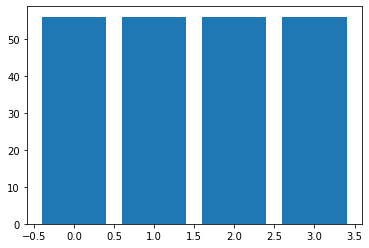

In [11]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
# transform the dataset
strategy = {0:56, 1:56, 2:56, 3:56}
oversample = SMOTE(sampling_strategy=strategy)
X, Y = oversample.fit_resample(X, Y)
# summarize distribution
counter = Counter(Y)
for k,v in counter.items():
	per = v / len(Y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

**Train/Test split**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

**One-hot encoding the objective variable**

In [13]:
yhot = np_utils.to_categorical(Y)
yhot_train = np_utils.to_categorical(y_train)
yhot_test = np_utils.to_categorical(y_test)

**Defining base model and parameters of the neuronal network**

In [14]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	# Rectified Linear Unit Activation Function
	model.add(Dense(142, input_dim=71, activation='relu'))
	model.add(Dense(142, activation = 'relu'))
	# Softmax for multi-class classification
	model.add(Dense(4, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

**Defining base model and parameters of the neuronal network**

In [15]:
# model = baseline_model()
cmodel = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=100, verbose=0)

**Defining scoring method**

In [16]:
kfold = KFold(n_splits=10, shuffle=True)

**Printing result of accuracy of the method**

In [18]:
result = cross_val_score(cmodel, X, yhot, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (result.mean()*100, result.std()*100))

Baseline: 86.52% (7.68%)


In [19]:
model = baseline_model()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, yhot_train, validation_split=0.33,
                    epochs=200, batch_size=100, verbose=0)

**Ploting the accuracy and loss of the method in every epoch**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


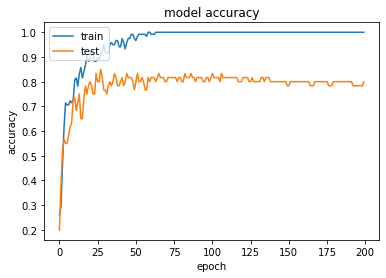

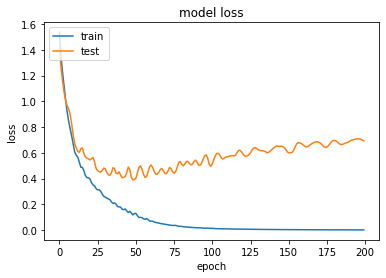

In [20]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Evaluating Keras model**

In [21]:
_, accuracy = model.evaluate(X_test, yhot_test)
print('Accuracy from evaluate: %.2f' % (accuracy*100))

2/2 [==============================] - 0s 4ms/step - loss: 0.5757 - accuracy: 0.7778
Accuracy from evaluate: 77.78


**Other form of getting the accuracy of the model**

In [22]:
predict_x = model.predict(X_test)
pred = np.argmax(predict_x, axis=1)
print(f'Prediction Accuracy: {(pred == y_test).mean() * 100:f}')

Prediction Accuracy: 77.777778


**Plotting the confussion matrix**

In [23]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86        12
         1.0       0.88      0.58      0.70        12
         2.0       0.67      0.77      0.71        13
         3.0       1.00      0.75      0.86         8

    accuracy                           0.78        45
   macro avg       0.82      0.78      0.78        45
weighted avg       0.80      0.78      0.77        45

